<a href="https://colab.research.google.com/github/bhav09/Pokemon-Data-Analysis/blob/master/Pok%C3%A9mon_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
data=pd.read_csv('/content/Pokemon.csv')

In [4]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [0]:
#we will be analysing different things from the dataset above .

In [5]:
#1

#firstly we will be analysing how many generations are there in the pokemon according to the data set
print(set(data['Generation']))

{1, 2, 3, 4, 5, 6}


In [7]:
#2

#now analysing how many pokemons are there in each generation
poke_count={}
count=1
for i in data['Generation']:
  #print(i)
  if i not in poke_count.keys():
    poke_count.update({i:count})
  else:
    poke_count[i]+=1
poke_count

{1: 166, 2: 106, 3: 160, 4: 121, 5: 165, 6: 82}

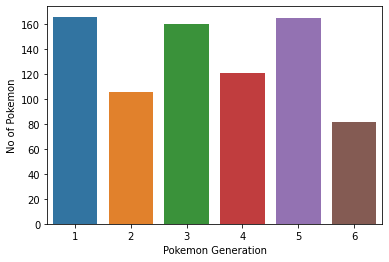

In [28]:
gen_key=list(poke_count.keys())
gen_val=list(poke_count.values())
sns.barplot(gen_key,gen_val)
plt.xlabel('Pokemon Generation')
plt.ylabel('No of Pokemon')
plt.show()

In [11]:
#3

#to find different types of pokemon (considering type 1)
print(set(data['Type 1']))
poke_type=set(data['Type 1'])
print('Total types are:',len(poke_type))

{'Poison', 'Fairy', 'Normal', 'Psychic', 'Dark', 'Electric', 'Fire', 'Steel', 'Ghost', 'Bug', 'Fighting', 'Rock', 'Ice', 'Flying', 'Water', 'Grass', 'Ground', 'Dragon'}
Total types are: 18


In [0]:
#4

#will now be counting number of pokemon each type has 
type_count={}
count=1
for i in data['Type 1']:
  if i not in type_count.keys():
    type_count.update({i:count})
  else:
    type_count[i]+=1
print(type_count)
max_no=max(type_count.values()) #water
min_no=min(type_count.values()) #flying
#print(get_key(max_no),max_no,'\t',min_no)

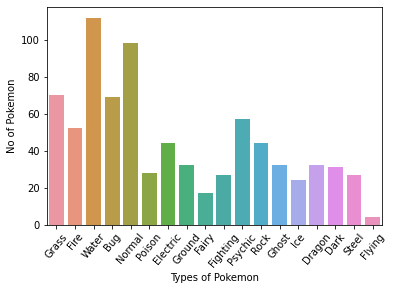

In [26]:
#visualizing the number of pokemon each type has
keys=type_count.keys()
val=type_count.values()
val=list(val)
keys=list(keys)
sns.barplot(x=keys,y=val)
plt.xticks(rotation=50)
plt.xlabel('Types of Pokemon')
plt.ylabel('No of Pokemon')
plt.show()

In [33]:
#5

#finding the name of  pokemons who's total is the highest and lowest
max_total=max(data['Total'])
min_total=min(data['Total'])
for index,row in data.iterrows():
    if row['Total']==max_total:
      max_name=row['Name']
    elif row['Total']==min_total:
      min_name=row['Name']
print('Pokemon with the highest total is:',max_name)
print('Pokemon with the highest total is:',min_name)


Pokemon with the highest total is: RayquazaMega Rayquaza
Pokemon with the highest total is: Sunkern


In [34]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [37]:
col=data.columns
col=list(col)
col

['#',
 'Name',
 'Type 1',
 'Type 2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

In [41]:
#6

#pokemon with highest hp , attack , def , sp atk, etc
stats=col[5:11]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [46]:
max_of_stats={} #will have max of every stat
min_of_stats={} #will have min of every stat
for i in stats:
  max_of_stats.update({i:max(data[i])})
  min_of_stats.update({i:min(data[i])})
print('Dictionary of Max stats',max_of_stats)
print('Dictionary of Min stats',min_of_stats)

Dictionary of Max stats {'HP': 255, 'Attack': 190, 'Defense': 230, 'Sp. Atk': 194, 'Sp. Def': 230, 'Speed': 180}
Dictionary of Min stats {'HP': 1, 'Attack': 5, 'Defense': 5, 'Sp. Atk': 10, 'Sp. Def': 20, 'Speed': 5}


In [68]:
#7

key_max_stats=list(max_of_stats.keys())
val_max_stats=list(max_of_stats.values())

def get_key(val): 
    for key, value in max_of_stats.items(): 
         if val == value: 
             return key 

#name of the pokemon who has the above max stats
for index,row in data.iterrows():
  name=row['Name']
  for i in val_max_stats:
    #print(i,get_key(i))
    x=get_key(i)
    if i in data[x]:
      print(f'{data[x]}',row['Name'])


Streaming output truncated to the last 5000 lines.
      ... 
795    100
796    160
797    150
798    170
799    130
Name: Sp. Atk, Length: 800, dtype: int64 Fletchinder
0       49
1       63
2       83
3      123
4       43
      ... 
795    150
796    110
797     60
798     60
799    120
Name: Defense, Length: 800, dtype: int64 Fletchinder
0       45
1       60
2       80
3       80
4       65
      ... 
795     50
796    110
797     70
798     80
799     70
Name: Speed, Length: 800, dtype: int64 Fletchinder
0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64 Talonflame
0       49
1       62
2       82
3      100
4       52
      ... 
795    100
796    160
797    110
798    160
799    110
Name: Attack, Length: 800, dtype: int64 Talonflame
0       49
1       63
2       83
3      123
4       43
      ... 
795    150
796    110
797     60
798     60
799    120
Name: Defense, Length: 800, dtype:

In [73]:
#8

strong_poke=[]
for index,row in data.iterrows():
  #print(name_of_poke)
  if row['Total']>600:
    name_of_poke=row['Name']
    strong_poke.append(name_of_poke)
strong_poke=set(strong_poke)
print(strong_poke)
print(len(strong_poke))

{'Kyurem', 'BlazikenMega Blaziken', 'HoopaHoopa Unbound', 'BlastoiseMega Blastoise', 'Rayquaza', 'GardevoirMega Gardevoir', 'AggronMega Aggron', 'Regigigas', 'GiratinaAltered Forme', 'Palkia', 'SceptileMega Sceptile', 'Reshiram', 'RayquazaMega Rayquaza', 'MewtwoMega Mewtwo X', 'GarchompMega Garchomp', 'Zekrom', 'Ho-oh', 'KyuremBlack Kyurem', 'MewtwoMega Mewtwo Y', 'LatiosMega Latios', 'GalladeMega Gallade', 'Lugia', 'CharizardMega Charizard X', 'KyogrePrimal Kyogre', 'TyranitarMega Tyranitar', 'GiratinaOrigin Forme', 'GyaradosMega Gyarados', 'SteelixMega Steelix', 'MetagrossMega Metagross', 'SwampertMega Swampert', 'Arceus', 'KyuremWhite Kyurem', 'Groudon', 'CharizardMega Charizard Y', 'AerodactylMega Aerodactyl', 'Xerneas', 'Mewtwo', 'Slaking', 'Yveltal', 'SalamenceMega Salamence', 'DiancieMega Diancie', 'Kyogre', 'Dialga', 'LucarioMega Lucario', 'AmpharosMega Ampharos', 'LatiasMega Latias', 'GroudonPrimal Groudon', 'VenusaurMega Venusaur'}
48


In [74]:
poke_type

{'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water'}

In [78]:
#9

#strongest pokemon in each type
#the strongest is determinded by the total metric
strong_poke_per_type={} #type : name
for i in poke_type:  
  ref_tot,ref_name=[],[]
  for index,row in data.iterrows():
    name=row['Name']
    if i==row['Type 1']:
      ref_tot.append(row['Total'])
      ref_name.append(row['Name'])
  index_val=ref_tot.index(max(ref_tot))
  tough_poke_name=ref_name[index_val]    
  strong_poke_per_type.update({i:tough_poke_name})
strong_poke_per_type      


{'Bug': 'PinsirMega Pinsir',
 'Dark': 'Yveltal',
 'Dragon': 'RayquazaMega Rayquaza',
 'Electric': 'AmpharosMega Ampharos',
 'Fairy': 'Xerneas',
 'Fighting': 'LucarioMega Lucario',
 'Fire': 'Ho-oh',
 'Flying': 'TornadusIncarnate Forme',
 'Ghost': 'GiratinaAltered Forme',
 'Grass': 'SceptileMega Sceptile',
 'Ground': 'GroudonPrimal Groudon',
 'Ice': 'Articuno',
 'Normal': 'Arceus',
 'Poison': 'Crobat',
 'Psychic': 'MewtwoMega Mewtwo X',
 'Rock': 'TyranitarMega Tyranitar',
 'Steel': 'MetagrossMega Metagross',
 'Water': 'KyogrePrimal Kyogre'}

In [81]:
#10

#finding the strongest pokemon per type on the basis of HP, ATk, Def etc
strong_poke_per_type_basis={} #type : name
for k in stats:
  print('On the basis of : ',k)
  for i in poke_type:  
    ref_tot,ref_name=[],[]
    for index,row in data.iterrows():
      name=row['Name']
      if i==row['Type 1']:
        ref_tot.append(row[k])
        ref_name.append(row['Name'])
    index_val=ref_tot.index(max(ref_tot))
    tough_poke_name=ref_name[index_val]    
    strong_poke_per_type_basis.update({i:tough_poke_name})
  print(strong_poke_per_type_basis)
  print()


On the basis of :  HP
{'Poison': 'Muk', 'Fairy': 'Xerneas', 'Normal': 'Blissey', 'Psychic': 'Wobbuffet', 'Dark': 'Yveltal', 'Electric': 'Zapdos', 'Fire': 'Entei', 'Steel': 'Jirachi', 'Ghost': 'Drifblim', 'Bug': 'Yanmega', 'Fighting': 'Hariyama', 'Rock': 'Aurorus', 'Ice': 'Walrein', 'Flying': 'Noivern', 'Water': 'Wailord', 'Grass': 'Gogoat', 'Ground': 'Rhyperior', 'Dragon': 'Kyurem'}

On the basis of :  Attack
{'Poison': 'Toxicroak', 'Fairy': 'Xerneas', 'Normal': 'Slaking', 'Psychic': 'MewtwoMega Mewtwo X', 'Dark': 'AbsolMega Absol', 'Electric': 'Electivire', 'Fire': 'BlazikenMega Blaziken', 'Steel': 'AegislashBlade Forme', 'Ghost': 'BanetteMega Banette', 'Bug': 'HeracrossMega Heracross', 'Fighting': 'LucarioMega Lucario', 'Rock': 'Rampardos', 'Ice': 'Mamoswine', 'Flying': 'TornadusIncarnate Forme', 'Water': 'GyaradosMega Gyarados', 'Grass': 'AbomasnowMega Abomasnow', 'Ground': 'GroudonPrimal Groudon', 'Dragon': 'RayquazaMega Rayquaza'}

On the basis of :  Defense
{'Poison': 'Weezing', 